### Task 1 : Average annual, seasonal temperature and precipitation and drought indicators for those district (Mugu, Kalikot, Jumla and Humla)

- ERA5 data of 1950 to 2023 

In [1]:
# Import libraries 

import pandas as pd 
from scipy.stats import linregress 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Load ERA5 data 

precTot_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/precTot_1950_2023_district.csv")
tempMax_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/tempMax_1950_2023_district.csv")
tempMin_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/tempMin_1950_2023_district.csv")

In [3]:
# Select particular districts according to our need 

precTot_1950_2023_district = precTot_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMax_1950_2023_district = tempMax_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMin_1950_2023_district = tempMin_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]

#### Annual mean and annual sum

In [10]:
# Take annual mean and annual sum of min, max and precp 

tempMax_1950_2023_annual_mean = tempMax_1950_2023_district.groupby("year", as_index=False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
tempMin_1950_2023_annual_mean = tempMin_1950_2023_district.groupby("year", as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
precTot_1950_2023_annual_sum = precTot_1950_2023_district.groupby("year", as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].sum()

In [17]:
# Filter according to year 1970-2022 

tempMax_1970_2023_annual_mean = tempMax_1950_2023_annual_mean[(tempMax_1950_2023_annual_mean["year"] >= 1970) & (tempMax_1950_2023_annual_mean["year"] <= 2023)]
tempMin_1970_2023_annual_mean = tempMin_1950_2023_annual_mean[(tempMin_1950_2023_annual_mean["year"] >= 1970) & (tempMin_1950_2023_annual_mean["year"] <= 2023)]
precTot_1970_2023_annual_sum = precTot_1950_2023_annual_sum[(precTot_1950_2023_annual_sum["year"] >= 1970) & (precTot_1950_2023_annual_sum["year"] <= 2023)]

In [ ]:
# Take mean of Max and Min temperature 

tempMean_1970_2023_annual_mean = pd.concat([tempMax_1970_2023_annual_mean, tempMin_1970_2023_annual_mean]).groupby(level=0).mean()
tempMean_1970_2023_annual_mean = tempMean_1970_2023_annual_mean[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMean_1970_2023_annual_mean

In [ ]:
year = tempMax_1970_2023_annual_mean[["year"]]
year

In [ ]:
tempMean_1970_2023_annual_mean = pd.merge(year, tempMean_1970_2023_annual_mean, left_index=True, right_index=True, how='inner')
tempMean_1970_2023_annual_mean

In [ ]:
# Now we have 4 dataframes to work with 

#tempMax_1970_2023_annual_mean
#tempMin_1970_2023_annual_mean
#tempMean_1970_2023_annual_mean
#precTot_1970_2023_annual_sum

In [ ]:
tempMin_1970_2023_annual_mean = tempMin_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMin_1970_2023_annual_mean.csv")
tempMax_1970_2023_annual_mean = tempMax_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMax_1970_2023_annual_mean.csv")
tempMean_1970_2023_annual_mean = tempMean_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMean_1970_2023_annual_mean.csv")
precTot_1970_2023_annual_sum = precTot_1970_2023_annual_sum.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/precTot_1970_2023_annual_sum.csv")

#### Monthly mean and monthly sum 

In [4]:
tempMax_1950_2023_district

,year,month,day,MUGU,KALIKOT,JUMLA,HUMLA
0,1950,1,1,-6.706208,2.563195,-2.790106,-11.227682
1,1950,1,2,-6.303056,5.241160,-1.715755,-11.896724
2,1950,1,3,-6.355443,6.279757,-1.193647,-13.382866
3,1950,1,4,-4.619134,7.139030,0.304827,-11.703918
4,1950,1,5,-6.250503,6.166445,-1.210127,-13.177432
...,...,...,...,...,...,...,...
27023,2023,12,27,1.824372,11.557232,5.583734,-4.188072
27024,2023,12,28,1.285959,11.182984,5.115054,-5.265166
27025,2023,12,29,0.813693,10.599538,4.356198,-5.680753
27026,2023,12,30,0.081718,10.297513,3.971295,-6.239145


In [5]:
# Take annual mean and annual sum of min, max and precp 

tempMax_1950_2023_monthly_mean = tempMax_1950_2023_district.groupby(["year", "month"], as_index=False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
tempMin_1950_2023_monthly_mean = tempMin_1950_2023_district.groupby(["year", "month"], as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
precTot_1950_2023_monthly_sum = precTot_1950_2023_district.groupby(["year", "month"], as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].sum()

In [6]:
# Filter according to year 1970-2022 

tempMax_1970_2023_monthly_mean = tempMax_1950_2023_monthly_mean[(tempMax_1950_2023_monthly_mean["year"] >= 1970) & (tempMax_1950_2023_monthly_mean["year"] <= 2023)]
tempMin_1970_2023_monthly_mean = tempMin_1950_2023_monthly_mean[(tempMin_1950_2023_monthly_mean["year"] >= 1970) & (tempMin_1950_2023_monthly_mean["year"] <= 2023)]
precTot_1970_2023_monthly_sum = precTot_1950_2023_monthly_sum[(precTot_1950_2023_monthly_sum["year"] >= 1970) & (precTot_1950_2023_monthly_sum["year"] <= 2023)]

In [7]:
# Take mean of Max and Min temperature 

tempMean_1970_2023_monthly_mean = pd.concat([tempMax_1970_2023_monthly_mean, tempMin_1970_2023_monthly_mean]).groupby(level=0).mean()
tempMean_1970_2023_monthly_mean = tempMean_1970_2023_monthly_mean[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMean_1970_2023_monthly_mean

,MUGU,KALIKOT,JUMLA,HUMLA
240,-8.918266,2.059429,-5.644361,-13.918480
241,-9.541298,2.088249,-6.782284,-14.049714
242,-6.424570,6.022203,-3.102634,-10.741972
243,-0.080234,12.637440,3.455937,-5.068893
244,4.716162,15.532056,7.544856,0.418193
...,...,...,...,...
883,11.112354,16.859955,12.524665,8.255846
884,9.094696,16.060866,10.998502,5.532925
885,1.671238,11.257936,4.202403,-2.328601
886,-1.175073,7.979122,1.284949,-6.790713


In [8]:
year_month = tempMax_1970_2023_monthly_mean[["year", "month"]]
year_month

,year,month
240,1970,1
241,1970,2
242,1970,3
243,1970,4
244,1970,5
...,...,...
883,2023,8
884,2023,9
885,2023,10
886,2023,11


In [9]:
tempMean_1970_2023_monthly_mean = pd.merge(year_month, tempMean_1970_2023_monthly_mean, left_index=True, right_index=True, how='inner')
tempMean_1970_2023_monthly_mean

,year,month,MUGU,KALIKOT,JUMLA,HUMLA
240,1970,1,-8.918266,2.059429,-5.644361,-13.918480
241,1970,2,-9.541298,2.088249,-6.782284,-14.049714
242,1970,3,-6.424570,6.022203,-3.102634,-10.741972
243,1970,4,-0.080234,12.637440,3.455937,-5.068893
244,1970,5,4.716162,15.532056,7.544856,0.418193
...,...,...,...,...,...,...
883,2023,8,11.112354,16.859955,12.524665,8.255846
884,2023,9,9.094696,16.060866,10.998502,5.532925
885,2023,10,1.671238,11.257936,4.202403,-2.328601
886,2023,11,-1.175073,7.979122,1.284949,-6.790713


In [ ]:
# Now we have 4 monthly dataframes to work with 

#tempMax_1970_2023_monthly_mean
#tempMin_1970_2023_monthly_mean
#tempMean_1970_2023_monthly_mean
#precTot_1970_2023_monthly_sum

In [10]:
tempMin_1970_2023_monthly_mean = tempMin_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMin_1970_2023_monthly_mean.csv")
tempMax_1970_2023_monthly_mean = tempMax_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMax_1970_2023_monthly_mean.csv")
tempMean_1970_2023_monthly_mean = tempMean_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMean_1970_2023_monthly_mean.csv")
precTot_1970_2023_monthly_sum = precTot_1970_2023_monthly_sum.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/precTot_1970_2023_monthly_sum.csv")

### Average annual, seasonal temperature and precipitation (monthly data) and drought indicators for those district

In [11]:
# Annual data

tempMin_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMin_1970_2023_annual_mean.csv")
tempMax_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMax_1970_2023_annual_mean.csv")
tempMean_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMean_1970_2023_annual_mean.csv")
precTot_1970_2023_annual_sum = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/precTot_1970_2023_annual_sum.csv")

# Monthly data 

tempMin_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMin_1970_2023_monthly_mean.csv")
tempMax_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMax_1970_2023_monthly_mean.csv")
tempMean_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMean_1970_2023_monthly_mean.csv")
precTot_1970_2023_monthly_sum = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/precTot_1970_2023_monthly_sum.csv")

In [17]:
# Annual trend of tempMax, tempMin, tempMean and precTot of 4 districts 

#tempMax

year = tempMax_1970_2023_annual_mean["year"]
Mugu_annual_tempMax = tempMax_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMax = tempMax_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMax = tempMax_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMax = tempMax_1970_2023_annual_mean["HUMLA"]

#tempMin

Mugu_annual_tempMin = tempMin_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMin = tempMin_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMin = tempMin_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMin = tempMin_1970_2023_annual_mean["HUMLA"]

#tempMean

Mugu_annual_tempMean = tempMean_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMean = tempMean_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMean = tempMean_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMean = tempMean_1970_2023_annual_mean["HUMLA"]

#precpTot

Mugu_annual_precpTot = precTot_1970_2023_annual_sum["MUGU"]
Kalikot_annual_precpTot = precTot_1970_2023_annual_sum["KALIKOT"]
Jumla_annual_precpTot = precTot_1970_2023_annual_sum["JUMLA"]
Humla_annual_precpTot = precTot_1970_2023_annual_sum["HUMLA"]


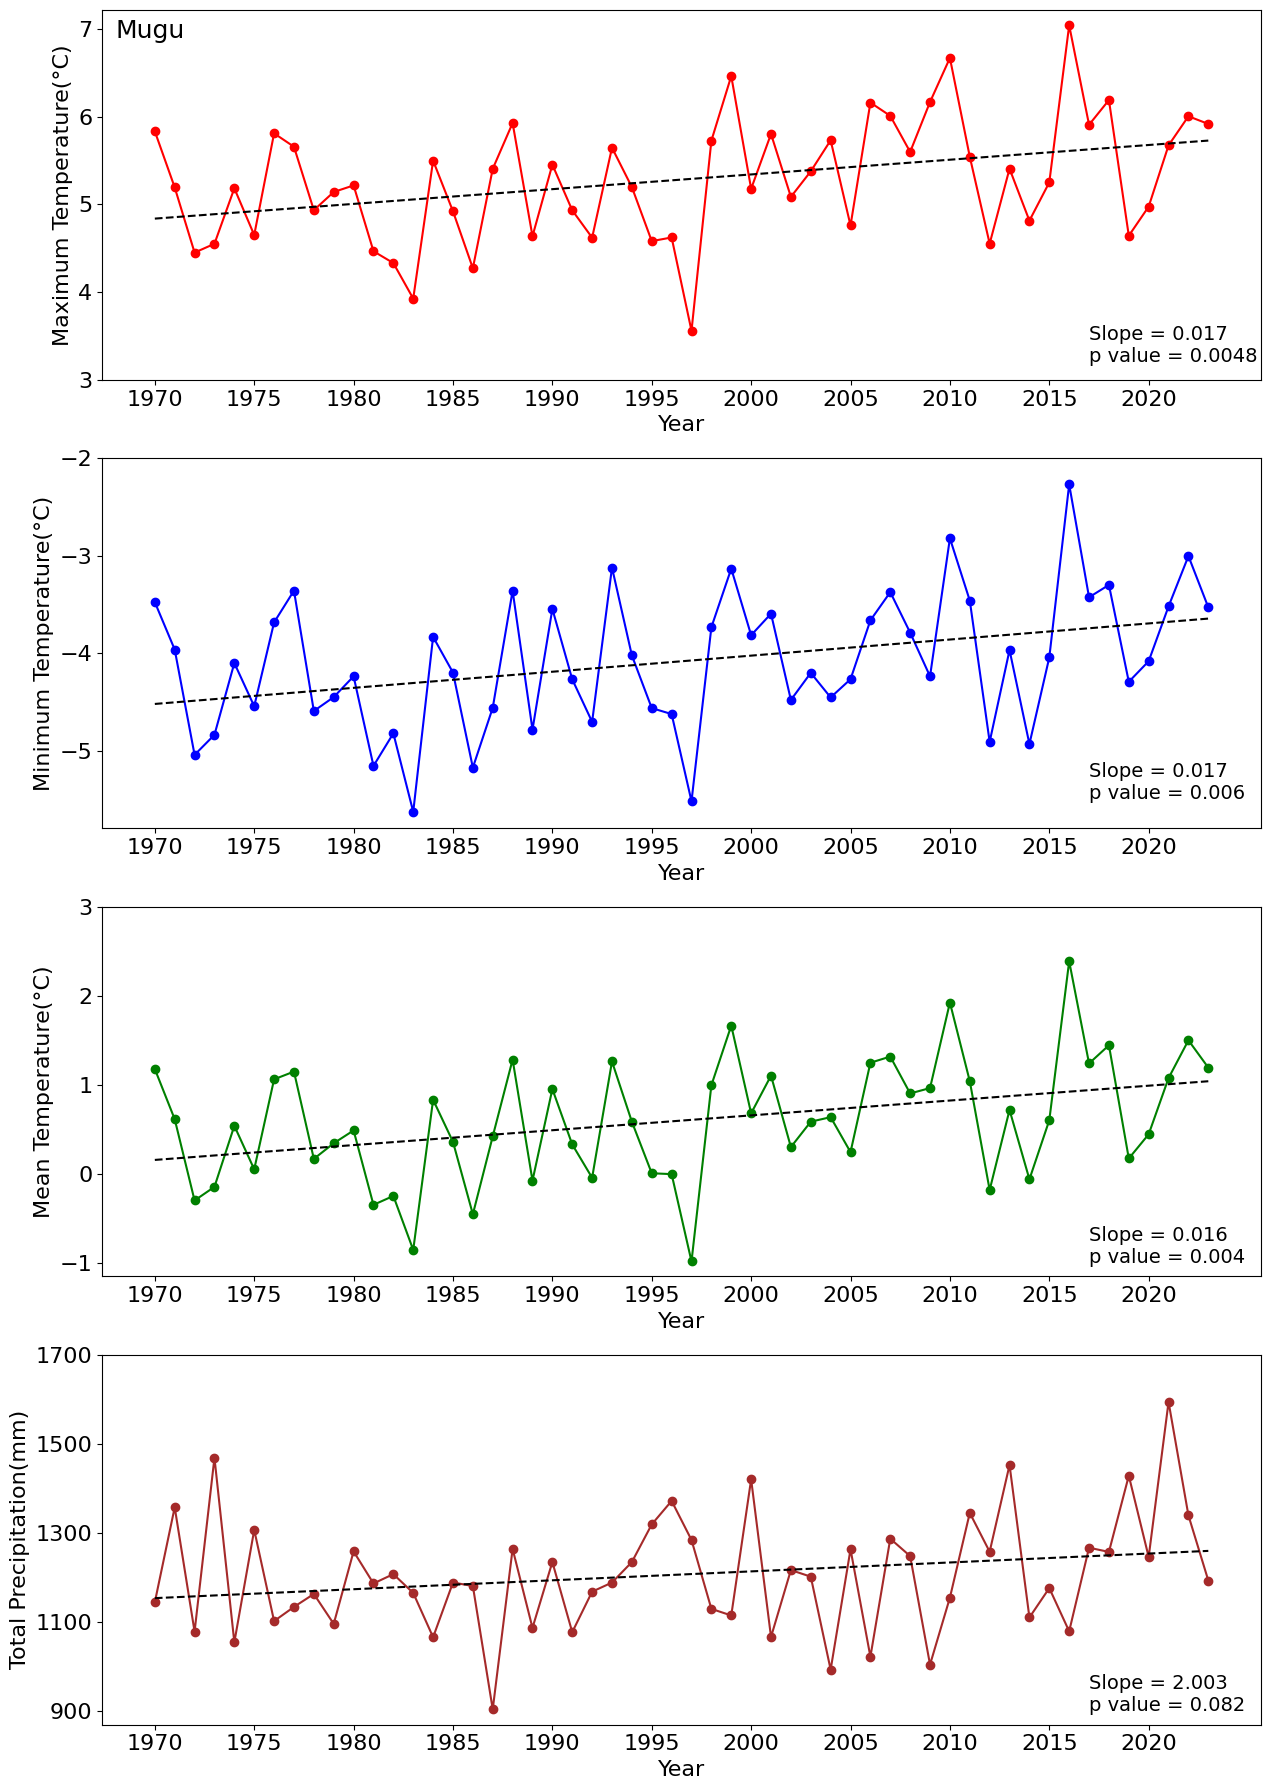

In [63]:
# %%
# Creatine a line plots for MUGU

year = tempMax_1970_2023_annual_mean["year"]
Mugu_annual_tempMax = tempMax_1970_2023_annual_mean["MUGU"]
Mugu_annual_tempMin = tempMin_1970_2023_annual_mean["MUGU"]
Mugu_annual_tempMean = tempMean_1970_2023_annual_mean["MUGU"]
Mugu_annual_precpTot = precTot_1970_2023_annual_sum["MUGU"]

# Fit linear regression model for Mugu_annual_tempMax
Mugu_annual_tempMax_coefficients = np.polyfit(year, Mugu_annual_tempMax, 1)
Mugu_annual_tempMax_polynomial = np.poly1d(Mugu_annual_tempMax_coefficients)

# Fit linear regression model for Mugu_annual_tempMin
Mugu_annual_tempMin_coefficients = np.polyfit(year, Mugu_annual_tempMin, 1)
Mugu_annual_tempMin_polynomial = np.poly1d(Mugu_annual_tempMin_coefficients)

# Fit linear regression model for Mugu_annual_tempMean
Mugu_annual_tempMean_coefficients = np.polyfit(year, Mugu_annual_tempMean, 1)
Mugu_annual_tempMean_polynomial = np.poly1d(Mugu_annual_tempMean_coefficients)

# Fit linear regression model for Mugu_annual_tempMax
Mugu_annual_precpTot_coefficients = np.polyfit(year, Mugu_annual_precpTot, 1)
Mugu_annual_precpTot_polynomial = np.poly1d(Mugu_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - MUGU (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Mugu_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Mugu_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([3,4,5,6,7], fontsize=16)
plt.text(2017,3.2,"Slope = 0.017 \np value = 0.0048", fontsize=14)
plt.text(1968, 6.9, "Mugu", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  MUGU (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Mugu_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Mugu_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-5,-4,-3,-2], fontsize=16)
plt.text(2017,-5.5,"Slope = 0.017 \np value = 0.006 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  MUGU (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Mugu_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Mugu_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([-1,0,1,2,3], fontsize=16)
plt.text(2017,-1,"Slope = 0.016 \np value = 0.004", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - MUGU (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Mugu_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Mugu_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([900,1100,1300,1500,1700], fontsize=16)
plt.text(2017,900,"Slope = 2.003 \np value = 0.082", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('MUGU_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

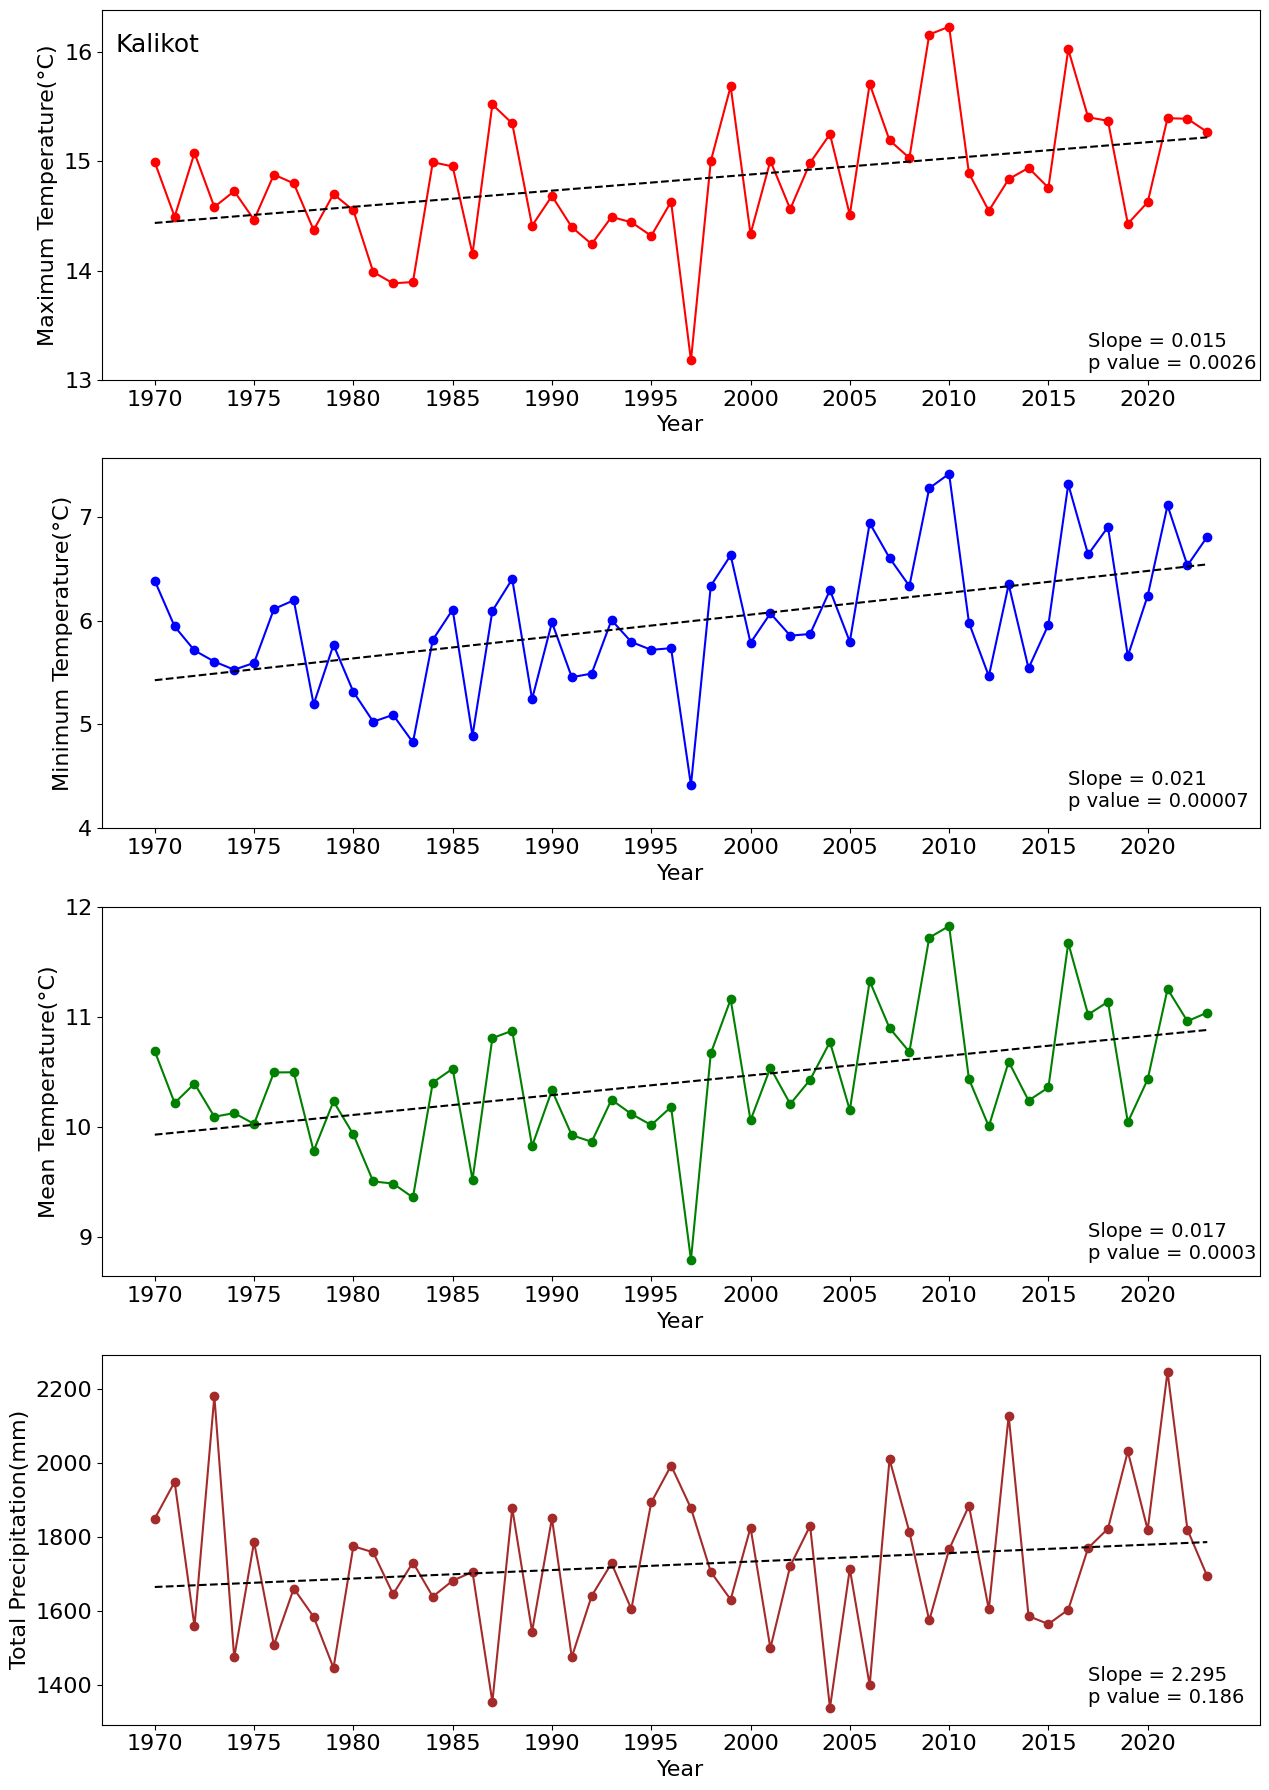

In [85]:
# %%
# Creatine a line plots for Kalikot

year = tempMax_1970_2023_annual_mean["year"]
Kalikot_annual_tempMax = tempMax_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_tempMin = tempMin_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_tempMean = tempMean_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_precpTot = precTot_1970_2023_annual_sum["KALIKOT"]

# Fit linear regression model for Kalikot_annual_tempMax
Kalikot_annual_tempMax_coefficients = np.polyfit(year, Kalikot_annual_tempMax, 1)
Kalikot_annual_tempMax_polynomial = np.poly1d(Kalikot_annual_tempMax_coefficients)

# Fit linear regression model for Kalikot_annual_tempMin
Kalikot_annual_tempMin_coefficients = np.polyfit(year, Kalikot_annual_tempMin, 1)
Kalikot_annual_tempMin_polynomial = np.poly1d(Kalikot_annual_tempMin_coefficients)

# Fit linear regression model for Kalikot_annual_tempMean
Kalikot_annual_tempMean_coefficients = np.polyfit(year, Kalikot_annual_tempMean, 1)
Kalikot_annual_tempMean_polynomial = np.poly1d(Kalikot_annual_tempMean_coefficients)

# Fit linear regression model for Kalikot_annual_tempMax
Kalikot_annual_precpTot_coefficients = np.polyfit(year, Kalikot_annual_precpTot, 1)
Kalikot_annual_precpTot_polynomial = np.poly1d(Kalikot_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Kalikot (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Kalikot_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Kalikot_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([13,14,15,16], fontsize=16)
plt.text(2017,13.1,"Slope = 0.015 \np value = 0.0026", fontsize=14)
plt.text(1968, 16, "Kalikot", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Kalikot (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Kalikot_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Kalikot_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([4,5,6,7], fontsize=16)
plt.text(2016,4.2,"Slope = 0.021 \np value = 0.00007 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Kalikot (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Kalikot_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Kalikot_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([9,10,11,12], fontsize=16)
plt.text(2017,8.8,"Slope = 0.017 \np value = 0.0003", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Kalikot (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Kalikot_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Kalikot_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([1400,1600,1800,2000,2200], fontsize=16)
plt.text(2017,1350,"Slope = 2.295 \np value = 0.186", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Kalikot_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

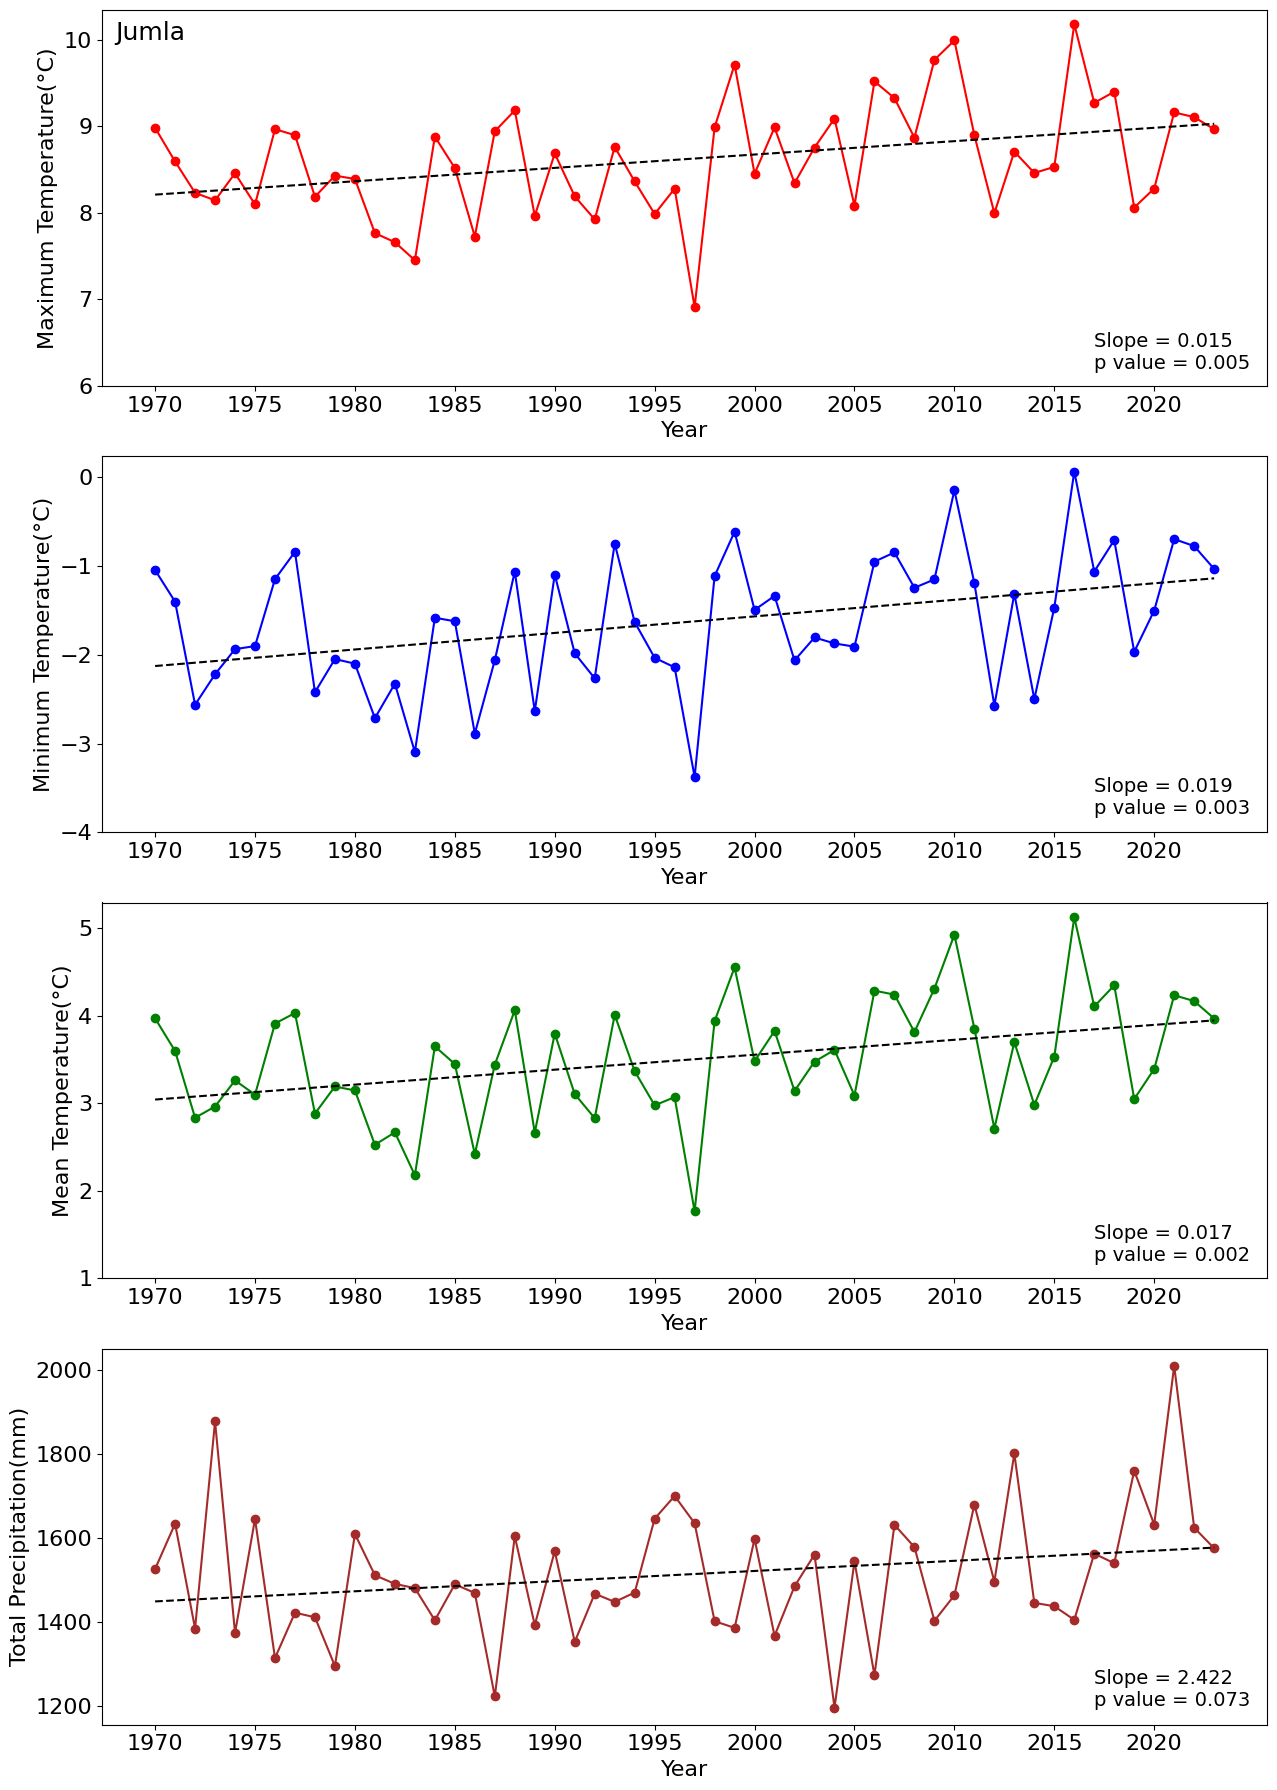

In [105]:
# %%
# Creatine a line plots for Jumla

year = tempMax_1970_2023_annual_mean["year"]
Jumla_annual_tempMax = tempMax_1970_2023_annual_mean["JUMLA"]
Jumla_annual_tempMin = tempMin_1970_2023_annual_mean["JUMLA"]
Jumla_annual_tempMean = tempMean_1970_2023_annual_mean["JUMLA"]
Jumla_annual_precpTot = precTot_1970_2023_annual_sum["JUMLA"]

# Fit linear regression model for Jumla_annual_tempMax
Jumla_annual_tempMax_coefficients = np.polyfit(year, Jumla_annual_tempMax, 1)
Jumla_annual_tempMax_polynomial = np.poly1d(Jumla_annual_tempMax_coefficients)

# Fit linear regression model for Jumla_annual_tempMin
Jumla_annual_tempMin_coefficients = np.polyfit(year, Jumla_annual_tempMin, 1)
Jumla_annual_tempMin_polynomial = np.poly1d(Jumla_annual_tempMin_coefficients)

# Fit linear regression model for Jumla_annual_tempMean
Jumla_annual_tempMean_coefficients = np.polyfit(year, Jumla_annual_tempMean, 1)
Jumla_annual_tempMean_polynomial = np.poly1d(Jumla_annual_tempMean_coefficients)

# Fit linear regression model for Jumla_annual_tempMax
Jumla_annual_precpTot_coefficients = np.polyfit(year, Jumla_annual_precpTot, 1)
Jumla_annual_precpTot_polynomial = np.poly1d(Jumla_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Jumla (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Jumla_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Jumla_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([6,7,8,9,10], fontsize=16)
plt.text(2017,6.2,"Slope = 0.015 \np value = 0.005", fontsize=14)
plt.text(1968, 10, "Jumla", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Jumla (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Jumla_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Jumla_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-4,-3,-2,-1,0], fontsize=16)
plt.text(2017,-3.8,"Slope = 0.019 \np value = 0.003 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Jumla (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Jumla_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Jumla_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([1,2,3,4,5], fontsize=16)
plt.text(2017, 1.2,"Slope = 0.017 \np value = 0.002", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Jumla (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Jumla_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Jumla_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([1200,1400,1600,1800,2000], fontsize=16)
plt.text(2017,1200,"Slope = 2.422 \np value = 0.073", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Jumla_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

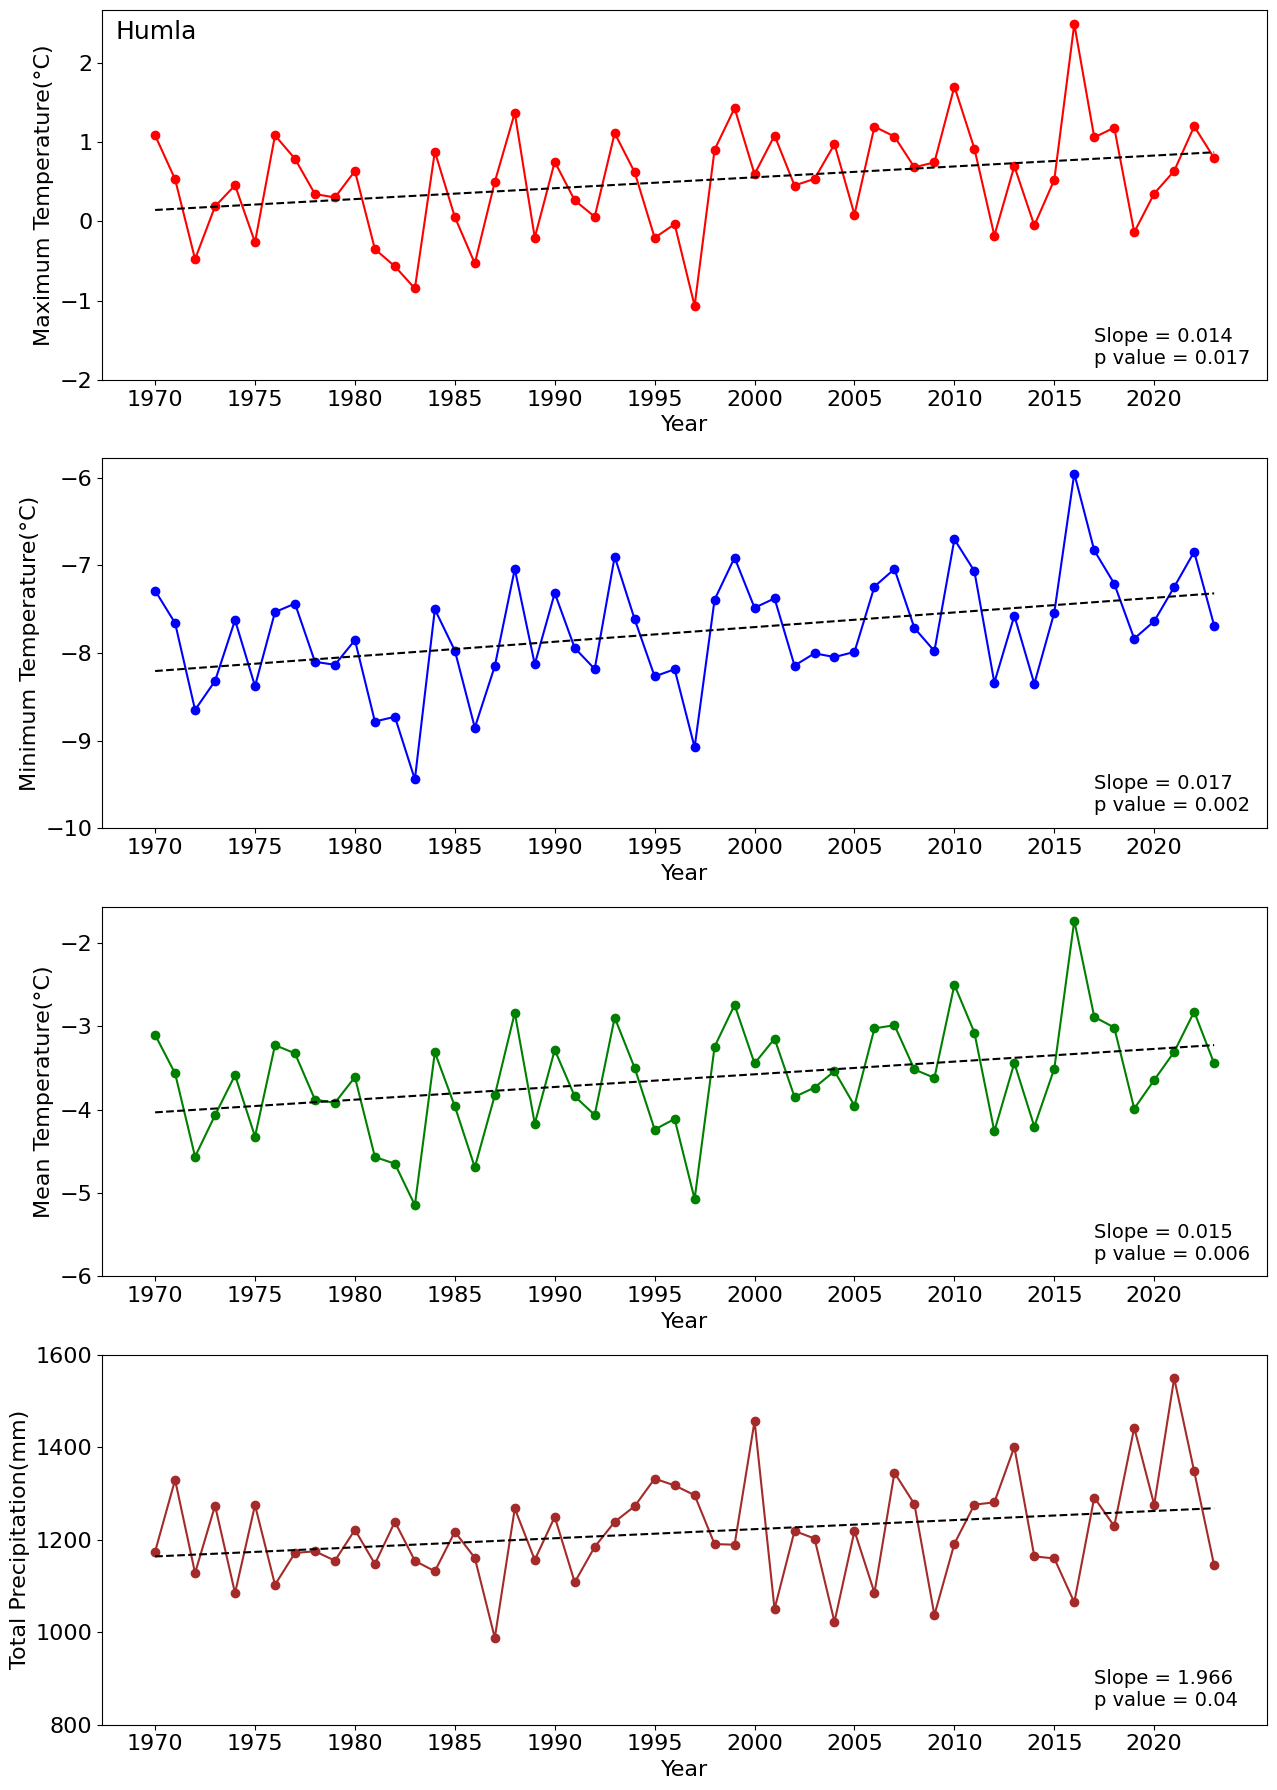

In [127]:
# %%
# Creatine a line plots for Humla

year = tempMax_1970_2023_annual_mean["year"]
Humla_annual_tempMax = tempMax_1970_2023_annual_mean["HUMLA"]
Humla_annual_tempMin = tempMin_1970_2023_annual_mean["HUMLA"]
Humla_annual_tempMean = tempMean_1970_2023_annual_mean["HUMLA"]
Humla_annual_precpTot = precTot_1970_2023_annual_sum["HUMLA"]

# Fit linear regression model for Humla_annual_tempMax
Humla_annual_tempMax_coefficients = np.polyfit(year, Humla_annual_tempMax, 1)
Humla_annual_tempMax_polynomial = np.poly1d(Humla_annual_tempMax_coefficients)

# Fit linear regression model for Humla_annual_tempMin
Humla_annual_tempMin_coefficients = np.polyfit(year, Humla_annual_tempMin, 1)
Humla_annual_tempMin_polynomial = np.poly1d(Humla_annual_tempMin_coefficients)

# Fit linear regression model for Humla_annual_tempMean
Humla_annual_tempMean_coefficients = np.polyfit(year, Humla_annual_tempMean, 1)
Humla_annual_tempMean_polynomial = np.poly1d(Humla_annual_tempMean_coefficients)

# Fit linear regression model for Humla_annual_tempMax
Humla_annual_precpTot_coefficients = np.polyfit(year, Humla_annual_precpTot, 1)
Humla_annual_precpTot_polynomial = np.poly1d(Humla_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Humla (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Humla_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Humla_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([-2,-1,0,1,2], fontsize=16)
plt.text(2017,-1.8,"Slope = 0.014 \np value = 0.017", fontsize=14)
plt.text(1968, 2.3, "Humla", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Humla (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Humla_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Humla_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-10,-9,-8,-7,-6], fontsize=16)
plt.text(2017,-9.8,"Slope = 0.017 \np value = 0.002 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Humla (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Humla_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Humla_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([-6,-5,-4,-3,-2], fontsize=16)
plt.text(2017, -5.8,"Slope = 0.015 \np value = 0.006", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Humla (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Humla_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Humla_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([800,1000,1200,1400,1600], fontsize=16)
plt.text(2017,840,"Slope = 1.966 \np value = 0.04", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Humla_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

##### Annual tempMax

In [19]:
# Calculate slope and p value using linregress function from scipy package. 
import scipy.stats

# Mugu_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.00479611664456217
Slope 0.016768626108223852
r_value 0.3782863667784601


In [20]:
# Kalikot_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.002578257987942681
Slope 0.014765753142705939
r_value 0.4020982521570709


In [21]:
# Jumla_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.004881318691369627
Slope 0.015428372140010423
r_value 0.3775849336819279


In [22]:
# Humla_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.01698399641971816
Slope 0.013722813904790722
r_value 0.3236149696802689


#### Annual tempMean

In [23]:
# Mugu_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.004219443449043057
Slope 0.01664619623706152
r_value 0.3833444800804464


In [24]:
# Kalikot_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.000320000856543035
Slope 0.017917674377374803
r_value 0.47146221494750007


In [25]:
# Jumla_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0029048799834401674
Slope 0.017042655096754455
r_value 0.39765441753150665


In [26]:
# Humla_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0060002308588222196
Slope 0.0152182247369894
r_value 0.36924958071215364


#### Annual tempMin

In [27]:
# Mugu_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.005783797797461353
Slope 0.016523766365899185
r_value 0.3707489876982315


In [29]:
# Kalikot_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 7.073072732033088e-05
Slope 0.021069595612043662
r_value 0.5138162580389938


In [30]:
# Jumla_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.003081048021775441
Slope 0.01865693805349849
r_value 0.3954385150502136


In [31]:
# Humla_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0025348507919571235
Slope 0.01671363556918807
r_value 0.40272597554816747


#### Annual Precipitation 

In [32]:
# Mugu_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.08256038309663527
Slope 2.0033924951734563
r_value 0.2384011605367253


In [33]:
# Kalikot_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.1862655311609744
Slope 2.2954056153831464
r_value 0.18261791928998922


In [34]:
# Jumla_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.07333048133502187
Slope 2.4227991974419134
r_value 0.24569119260781871


In [35]:
# Humla_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.04095311976997138
Slope 1.9664258615277745
r_value 0.2791297795312822
